# Análisis de datos en Python

A continuación, se describe un flujo de trabajo en python desde cargar los datos de un google sheets, procesarlos y generar algunos análisis propios de lo visto en los cursos de investigación experimental y no experimental.

## Cargar datos externos

Existen diversas maneras para cargar datos de internet. En este caso, utilizaremos el comando `!wget`. Para este ejemplo, usaremos una hoja modelo que se encuentra de uso libre para el ejercicio en el link siguiente enlace: https://docs.google.com/spreadsheets/d/1xvt5MnZ_vg57iRTU2HuZsA4mXlxI1PuY4nZCEWuvPQQ/export?format=csv

Al usar el comando `!wget` tenemos la opción de asignar un nuevo nombre al archivo descargado, agregando `-O nombre_del_archivo.extensión`. En este caso, el comando completo quedaría como la siguiente línea de comando.





In [ ]:
!wget -O datos.csv https://docs.google.com/spreadsheets/d/1xvt5MnZ_vg57iRTU2HuZsA4mXlxI1PuY4nZCEWuvPQQ/export?format=csv

--2024-09-11 05:38:44--  https://docs.google.com/spreadsheets/d/1xvt5MnZ_vg57iRTU2HuZsA4mXlxI1PuY4nZCEWuvPQQ/export?format=csv
Resolving docs.google.com (docs.google.com)... 74.125.26.138, 74.125.26.139, 74.125.26.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.26.138|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-08-24-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/cvtmdvk2c7ei3efn91j52ang40/1726033120000/102257836342390782400/*/1xvt5MnZ_vg57iRTU2HuZsA4mXlxI1PuY4nZCEWuvPQQ?format=csv [following]
--2024-09-11 05:38:44--  https://doc-08-24-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/cvtmdvk2c7ei3efn91j52ang40/1726033120000/102257836342390782400/*/1xvt5MnZ_vg57iRTU2HuZsA4mXlxI1PuY4nZCEWuvPQQ?format=csv
Resolving doc-08-24-sheets.googleusercontent.com (doc-08-24-sheets.googleusercontent.com)... 108.177.11.132, 2607:f8b0:400c:c01::84
Connecting to doc-08-24-sheets.googleusercontent.c

Luego de descargado el archivo, podemos observarlo si damos click al ícono del fichero en la parte izquierda de la interfaz de Colabs, con el nombre respectivo que le hemos dado.

Finalmente, para leer un archivo csv y convertirlo en un dataframe, tenemos que importar pandas y utilizar la función read_csv.

In [ ]:
import pandas as pd

df = pd.read_csv("datos.csv")
df

,Númerodeidentificación,salonndeclase,Carreraenlaqueteencuentras,pregunta1devariabledependiente,pregunta2devariabledependiente,pregunta3devariabledependiente,pregunta4devariabledependiente_setienequeinvertir,inteligenciaemociona,empatiadelparticipante
0,1,B,2,2,4,5,5,15,13
1,2,C,2,4,4,3,3,20,16
2,3,A,2,4,3,5,5,19,13
3,4,C,2,4,4,4,2,19,17
4,5,A,1,4,1,3,1,17,15
5,6,A,2,2,4,3,1,20,16
6,7,B,2,4,5,4,3,17,16
7,8,B,2,4,4,5,3,17,18
8,9,C,2,5,4,5,3,23,16
9,10,C,1,3,5,2,4,16,13


Ahora que tenemos el dataframe, realizaremos las siguientes operaciones como ejercicio de procesamiento de datos:

1.   proponer nombres de variables mas simples
2.   indicar que es carrera 1 y 2
3.   invertir la pregunta 4
4.   calcular el puntaje de autoeficacia

Para esto, será muy útil lo que hemos aprendido de los diccionarios, ya que pandas tiene funciones y métodos para realizar muchas de estas tareas, pero para comunicarnos con esas funciones y métodos, pandas a veces requiere que utilicemos diccionarios para informarle de las transformaciones que se quieren hacer.

A continuación, veremos como resolver cada una de estas tareas.

### Modificar los nombres

En el siguiente código, podemos observar como definimos un diccionario con el nombre `rename_dict`. Ten en cuenta que el primer término es el nombre antiguo y, el segundo, es el nuevo nombre que nos gustaría colocar a nuestros datos.

Posteriormente, usamos el método `rename` del dataframe, colocando el diccionario en el argumento `columns`, y especificamos el argumento `inplace` con "True", dado que  que queremos que este cambio se modifique en la misma base df.

In [ ]:
rename_dict = {
    "Númerodeidentificación": "id",
    "salonndeclase": "salon",
    "Carreraenlaqueteencuentras": "carrera",
    "pregunta1devariabledependiente": "auto1",
    "pregunta2devariabledependiente": "auto2",
    "pregunta3devariabledependiente": "auto3",
    "pregunta4devariabledependiente_setienequeinvertir": "auto4i",
    "inteligenciaemociona": "ie",
    "empatiadelparticipante": "em",
}

df.rename(columns=rename_dict, inplace=True)

df

,id,salon,carrera,auto1,auto2,auto3,auto4i,ie,em
0,1,B,2,2,4,5,5,15,13
1,2,C,2,4,4,3,3,20,16
2,3,A,2,4,3,5,5,19,13
3,4,C,2,4,4,4,2,19,17
4,5,A,1,4,1,3,1,17,15
5,6,A,2,2,4,3,1,20,16
6,7,B,2,4,5,4,3,17,16
7,8,B,2,4,4,5,3,17,18
8,9,C,2,5,4,5,3,23,16
9,10,C,1,3,5,2,4,16,13


### De números a caracteres

Lastimosamente, en la base tenemos una variable denominada "carrera", donde no se ha indicado a que carrera se refiere el valor 1 o 2. Supongamos que estos valores aluden a "Psicología" y "Física" respectivamente, ¿cómo haríamos el cambio?

Como en el caso anterior, solo es necesario construir otro diccionario. Sin embargo, esta vez usaremos el método `map` para modificar los valores de una columna en específico.

In [ ]:
carrera_cat = {1: "Psicología", 2: "Física"}

df["carrera"] = df["carrera"].map(carrera_cat)

df

,id,salon,carrera,auto1,auto2,auto3,auto4i,ie,em
0,1,B,Física,2,4,5,5,15,13
1,2,C,Física,4,4,3,3,20,16
2,3,A,Física,4,3,5,5,19,13
3,4,C,Física,4,4,4,2,19,17
4,5,A,Psicología,4,1,3,1,17,15
5,6,A,Física,2,4,3,1,20,16
6,7,B,Física,4,5,4,3,17,16
7,8,B,Física,4,4,5,3,17,18
8,9,C,Física,5,4,5,3,23,16
9,10,C,Psicología,3,5,2,4,16,13


### Inversión de ítems

Si has prestado atención al caso anterior, ya imaginaras como puedes invertir un ítem ... ¡con un diccionario!

En este caso, crearemos un diccionario para asignar nuevos valores a los valores que ya existían en nuestra variable. Naturalmente, haremos uso del método `map` para realizar estos cambios en la base.

In [ ]:
item_inv = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}

df["auto4i"] = df["auto4i"].map(item_inv)

df

,id,salon,carrera,auto1,auto2,auto3,auto4i,ie,em
0,1,B,Física,2,4,5,1,15,13
1,2,C,Física,4,4,3,3,20,16
2,3,A,Física,4,3,5,1,19,13
3,4,C,Física,4,4,4,4,19,17
4,5,A,Psicología,4,1,3,5,17,15
5,6,A,Física,2,4,3,5,20,16
6,7,B,Física,4,5,4,3,17,16
7,8,B,Física,4,4,5,3,17,18
8,9,C,Física,5,4,5,3,23,16
9,10,C,Psicología,3,5,2,2,16,13


### Creación de puntajes

Para este caso, el método que utilizaremos es un poco más directo: sumaremos cada columna y luego la dividiremos entre el total de número de columnas.

Sin embargo, es también pertinente mencionar que dentro del dataframe hay el método "mean", ya que si tenemos muchas columnas podemos seleccionarlas por su número de localización (por ejemplo [1:7] para seleccionar la segunda columna hasta la sexta, porque el último número es excluyente.)

In [ ]:
df["auto"] = (df["auto1"] + df["auto2"] + df["auto3"] + df["auto4i"]) / 4
df

# df["auto"] = df.iloc[:, 3:7].mean(axis = 1) <--- éste sería el otro método.

,id,salon,carrera,auto1,auto2,auto3,auto4i,ie,em,auto
0,1,B,Física,2,4,5,1,15,13,3.00
1,2,C,Física,4,4,3,3,20,16,3.50
2,3,A,Física,4,3,5,1,19,13,3.25
3,4,C,Física,4,4,4,4,19,17,4.00
4,5,A,Psicología,4,1,3,5,17,15,3.25
5,6,A,Física,2,4,3,5,20,16,3.50
6,7,B,Física,4,5,4,3,17,16,4.00
7,8,B,Física,4,4,5,3,17,18,4.00
8,9,C,Física,5,4,5,3,23,16,4.25
9,10,C,Psicología,3,5,2,2,16,13,3.00


¡Genial! Ahora si tenemos nuestra base de datos lista para trabajar. En base a esto, propondremos los siguientes análisis a realizar con la base.

1.   Evaluar las diferencias en el nivel de autoeficacia según la carrera.
2.   Evaluar las diferencias en el nivel de inteligencia emocional, según el salón.
3.   Analizar la capacidad predictiva de la inteligencia emocional y la empatía en la autoeficacia.

Para todos estos análisis, haremos uso del paquete "pingouin". No obstante, dado que este no viene por defecto en google colab, tendremos que instalarlo con el siguiente código.

In [ ]:
!pip install pingouin

## $t$ de Student

En primer lugar, vamos a evaluar las diferencias en el nivel de autoeficacia según la carrera. El primer paso, como siempre, es evaluar la normalidad. Para ello, usaremos la función "normality" del paquete pingouin.

Dentro de la documentación de pingouin, podemos ver que ésta función nos pide algunos argumentos para poder funcionar (es decir, los objetos en los que operar). Tendremos que proporcionarle distintos datos.

In [ ]:
import pingouin as pg

pg.normality(data=df, dv="auto", group="carrera")

,W,pval,normal
carrera,,,
Física,0.937991,0.472488,True
Psicología,0.890109,0.118220,True


Dado que ambos grupos tienen una distribución normal, podemos pasar a realizar la prueba de Levene con la función "homoscedasticity" para saber si tendremos necesidad del ajuste de Welch.

In [ ]:
pg.homoscedasticity(data=df, dv="auto", group="carrera", method="levene")

,W,pval,equal_var
levene,4.529412,0.044762,False


Como las varianzas son distintas, tendremos que realizar el ajuste de Welch para realizar la $t$ de Student. En este caso, en pingouin, la función "ttest" permite realizar la corrección con el argumento `correction=True`.

Luego, dado que pingouin nos exige colocar una variable diferente en sus argumentos x e y, necesitamos hacer un subsetting de nuestros datos. En otras palabras, tenemos que decir que, de todo el dataframe, sólo queremos los de la `'carrera' = 'Psicología'` en una parte y en la otra los de la `'carrera' = 'Física'`.

Esto puede tornarse un poco complicado de entender... pero recurramos a la visiòn espacial de los datos. Primero, para comunicarnos con un dataframe, hemos seguido el orden de decirle siempre filas y luego columnas. En otras palabras, X e Y. En este caso, tenemos que decirle que en el primer conjunto de datos sólo queremos las filas en donde se cumpla `'carrera' = 'Psicología'` o `'carrera' = 'Física'`. Luego, podemos decirle las columnas, y en este caso solo queremos la columna `'auto'`. Intenemos leer el siguiente código de esa forma.

Finalmente, como este un análisis con grupos independientes, señalarmos que `paired=False`.

In [ ]:
pg.ttest(
    x=df[df["carrera"] == "Psicología"]["auto"],
    y=df[df["carrera"] == "Física"]["auto"],
    correction=True,
    paired=False,
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.376244,18.303729,two-sided,0.028595,"[-0.67, -0.04]",0.970098,2.547,0.622386


Nuestros resultados advierten que hay diferencias significativas en el nivel de autoeficacia entre las carreras. Sin embargo, no sabemos que grupo es el de mayor nivel de la variable. Para ello, pedimos una tabla descriptiva de las variables de interés.

En este caso podemos utilizar el método `pivot_table` que acepta argumentos como `values` para los valores esperados, `index` para los índices que queremos utilizar para separar los valores y `aggfunc` para funciones integradas como `mean` o `sdt`

In [ ]:
df.pivot_table(values="auto", index="carrera", aggfunc=["mean", "std"])

,mean,std
,auto,auto
carrera,,
Física,3.750000,0.439525
Psicología,3.395833,0.270906


A partir de estos hallazgos, podemos observar que los que estudian Física tienen un mayor nivel de autoeficacia que los que estudian Psicología. Finalmente, sería bueno tener un gráfico de estas diferencias. Para este caso, trabajaremos con otro paquete denominado "seaborn".

Para ello, usaremos la función "barplot", donde especificamos a la "carrera" como nuestro eje "x" y a la autoeficacia como nuestro eje "y". Asimismo, indicamos la data donde se encuentren nuestras variables y colocamos "hue" como "carrera" poara modificar el color de las barras de acuerdo a esta variable.

<Axes: xlabel='carrera', ylabel='auto'>

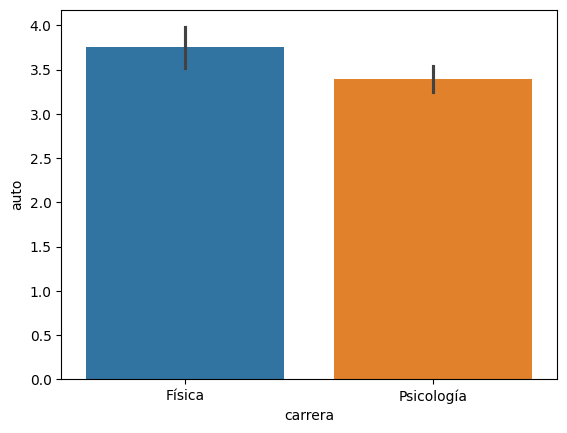

In [ ]:
import seaborn as sns

sns.barplot(x="carrera", y="auto", data=df, hue="carrera")

## Anova de una vía

En segundo lugar, vamos a evaluar las diferencias en el nivel de inteligencia emocional de acuerdo al salón de los participantes. Para ello, evaluaremos la normalidad.

In [ ]:
pg.normality(data=df, dv="ie", group="salon")

,W,pval,normal
salon,,,
B,0.857697,0.113883,True
C,0.917300,0.408338,True
A,0.843385,0.081587,True


Dado que todos los grupos tienen una distribución normal y trabajos con grupos independientes, realizaremos una prueba ANOVA de una vía. Así, tenemos que evaluar la homogeneidad de las varianzas con la prueba de Levene.

In [ ]:
pg.homoscedasticity(data=df, dv="ie", group="salon", method="levene")

,W,pval,equal_var
levene,2.542601,0.102604,True


Dado que las varianzas son iguales, realizaremos la prueba de ANOVA sin ajuste de welch. Para ello, haremos uso de la función "anova".

In [ ]:
pg.anova(data=df, dv="ie", between="salon")

,Source,ddof1,ddof2,F,p-unc,np2
0,salon,2,21,6.534073,0.006218,0.383588


El resultad de este análisis muestran que hay diferencias estadísticamente significativas con un tamaño del efecto grande. No obstante, es necesario saber donde se encuentran las diferencias específicas, por lo que realizaremos la prueba de Post Hoc de Tukey.

In [ ]:
pg.pairwise_tukey(data=df, dv="ie", between="salon")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,18.75,16.250,2.500,0.969014,2.579942,0.044232,1.929901
1,A,C,18.75,19.625,-0.875,0.969014,-0.902980,0.644416,-0.371630
2,B,C,16.25,19.625,-3.375,0.969014,-3.482922,0.006024,-1.454551


A partir de este análisis, se encontró que hay diferencias entre los salones A y B, y B y C. Especíicamente, el salón B obtuvo el menor nivel de inteligencia emocional que los salones A y C respectivamente. A fin de obtener la desviación estándar para nuestro reporte completo, podemos rehusar el código para obtener datos descriptivos.

In [ ]:
df.pivot_table(values="ie", index="salon", aggfunc=["mean", "std"])

,mean,std
,ie,ie
salon,,
A,18.750,1.281740
B,16.250,1.164965
C,19.625,2.875388


Finalmente, podemos completar este reporte con un gráfico de barras.

<Axes: xlabel='salon', ylabel='ie'>

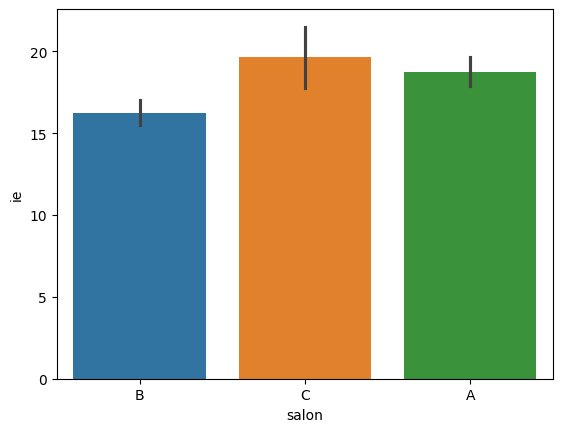

In [ ]:
sns.barplot(x="salon", y="ie", data=df, hue="salon")

## Regresión Lineal

A continuación, se realizará un modelo con la inteligencia emocional y la empatía como predictores de la autoeficacia. Para ello, es necesario que primero estimemos una asociación entre las variables.

El primer paso, sería generar un gráfico de dispersión de puntos. Para ello, haremos uso de la función "relplot" (abreviación de relational plot) del paquete seaborn.

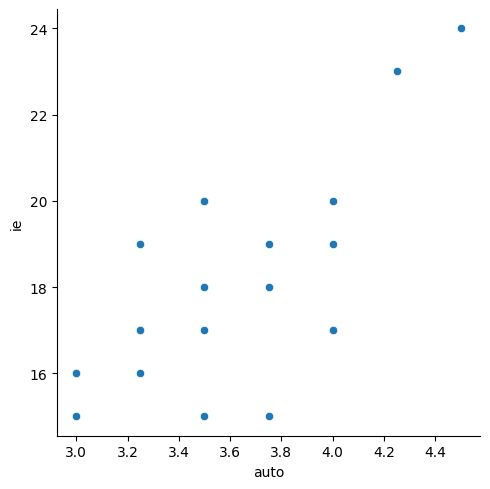

In [ ]:
sns.relplot(x="auto", y="ie", data=df)

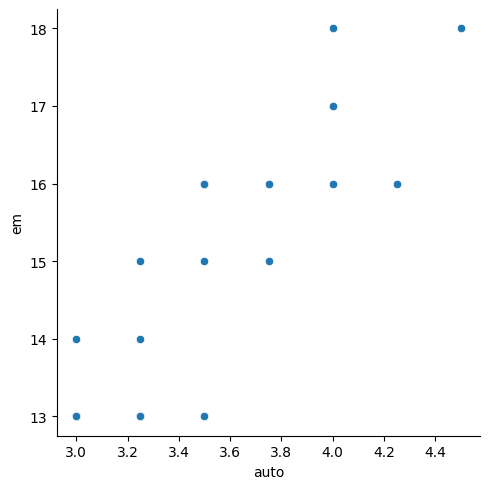

In [ ]:
sns.relplot(x="auto", y="em", data=df)

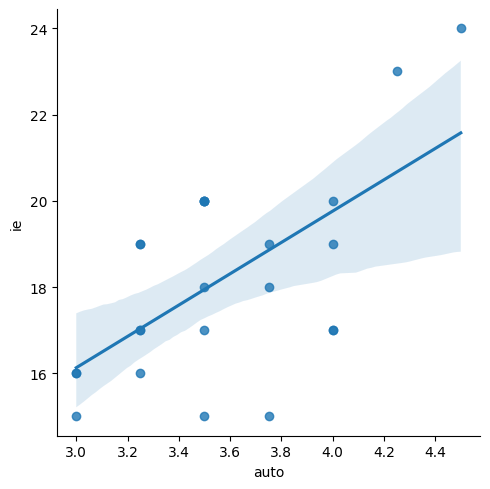

In [ ]:
sns.lmplot(x="auto", y="ie", data=df)

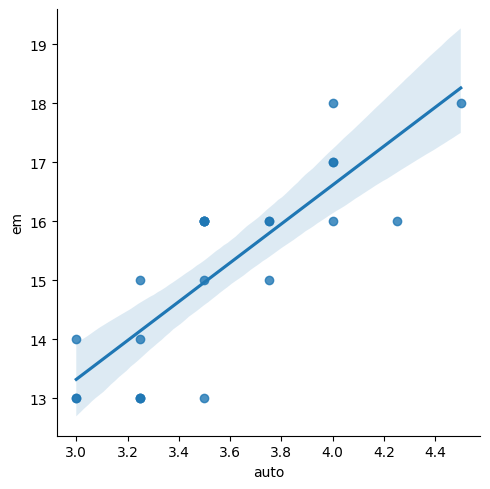

In [ ]:
sns.lmplot(x="auto", y="em", data=df)

El resultado de este gráfico alude a una posible relación positiva entre la autoeficacia y empatía. Sin embargo, es importante que se realize el análisis de correlación pertinente en función a la normalidad de los datos.

In [ ]:
pg.normality(data=df["auto"])

,W,pval,normal
auto,0.93714,0.140818,True


In [ ]:
pg.normality(data=df["em"])

,W,pval,normal
em,0.885388,0.010686,False


In [ ]:
pg.normality(data=df["ie"])

,W,pval,normal
ie,0.926597,0.081842,True


Dado que una de las variables no presenta una distribución normal, se tiene que aplicar la correlación de spearman.

In [ ]:
pg.corr(x=df["auto"], y=df["ie"], method="pearson")

,n,r,CI95%,p-val,BF10,power
pearson,24,0.616432,"[0.28, 0.82]",0.001338,32.332,0.918031


In [ ]:
pg.corr(x=df["auto"], y=df["em"], method="spearman")

,n,r,CI95%,p-val,power
spearman,24,0.834587,"[0.65, 0.93]",3.980524e-07,0.999859


Ahora, para realizar una regresión lineal con la autoeficacia y la empatía, pingouin nos ofrece una función para este cálculo tan usado en psicología `linear_regression`.

En este caso, `linear_regression` nos pide los argumentos `x`, `y` y `alpha`. También nos da la opción de agregar un intercepto con `add_intercept` ¿Alguien recuerda en la clase de estadística para qué nos servía esto?...

In [ ]:
pg.linear_regression(X=df[["ie", "em"]], y=df["auto"], add_intercept=True, alpha=0.05)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-0.107262,0.431665,-0.248483,0.806174,0.777948,0.7568,-1.004959,0.790435
1,ie,0.061131,0.018834,3.245749,0.003869,0.777948,0.7568,0.021963,0.100299
2,em,0.168795,0.027514,6.134819,0.000004,0.777948,0.7568,0.111576,0.226013


El coeficiente de determinación ajustado (`adj_r2`) fue $R^2$​=0.757, es decir, aproximadamente el 75.7% de la variación en la autoeficacia es por las dos variables asignadas. Según el criterio de Cohen, este ajuste indica un efecto de tamaño moderado.

En el caso de la inteligencia emocional, tenemos los valores (`coef`) $β_{ie}= 0.061$, p<0.01.

Esto significa que, con la empatía constante, cada punto en la inteligencia emocional aumenta aproximadamente un 0.061 la autoeficacia.

En el caso de la empatía, se tiene $β_{em}= 0.168$, p<0.0001.

Esto significa que por cada unidad de aumento en la empatía, la autoeficacia aumenta en 0.168 unidades, si es que asumimos que la inteligencia emocional se mantiene constante.

Si se quiere expresar esto en una ecuación, sería:

Autoeficacia = −0.107262 + 0.061131 ⋅ ie + 0.168795 ⋅ em + ϵ

# Bonus 1: Statsmodels

Si bien durante el tutorial nos hemos basado en todo lo que nos proporciona el paquete pingouin (diseñado para psicología), Python también tiene otros paquetes más generales.

En el caso de statsmodels, es un paquete especializado en la estadística en general. Este paquete incluye también un módulo para realizar una regresión, y brinda quizá más detalles.

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

# Fit regression model -> Modelo de regresión
model = smf.ols("auto ~ em + ie", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   auto   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     36.79
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           1.37e-07
Time:                        05:38:55   Log-Likelihood:                 6.4893
No. Observations:                  24   AIC:                            -6.979
Df Residuals:                      21   BIC:                            -3.444
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1073      0.432     -0.248      0.806      -1.005       0.790
em             0.1688      0.028      6.135      0.000       0.112       0.226
ie             0.0611      0.019      3.246      0.004       0.022       0.100
==============================================================================
Omnibus:                        1.023   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                0.792
Skew:                           0.023   Prob(JB):                        0.673
Kurtosis:                       2.111   Cond. No.                         256.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Bonus 2: Matplotlib

Seaborn es una paquete de visualización increible, en tanto nos permite tener gráfcos de alta calidad muy rápidamente. Sin embargo, es importante saber que detras de seaborn se encuentra el poderoso paquete matplotlib. Si bien este último puede resultar algo difiil de emplear, puede dar mucha versatilidad y libertad para crear un gráfico. A continuación, se coloca una serie de ejemplos de gráficos en matplotplib.

In [ ]:
df

,id,salon,carrera,auto1,auto2,auto3,auto4i,ie,em,auto
0,1,B,Física,2,4,5,1,15,13,3.00
1,2,C,Física,4,4,3,3,20,16,3.50
2,3,A,Física,4,3,5,1,19,13,3.25
3,4,C,Física,4,4,4,4,19,17,4.00
4,5,A,Psicología,4,1,3,5,17,15,3.25
5,6,A,Física,2,4,3,5,20,16,3.50
6,7,B,Física,4,5,4,3,17,16,4.00
7,8,B,Física,4,4,5,3,17,18,4.00
8,9,C,Física,5,4,5,3,23,16,4.25
9,10,C,Psicología,3,5,2,2,16,13,3.00


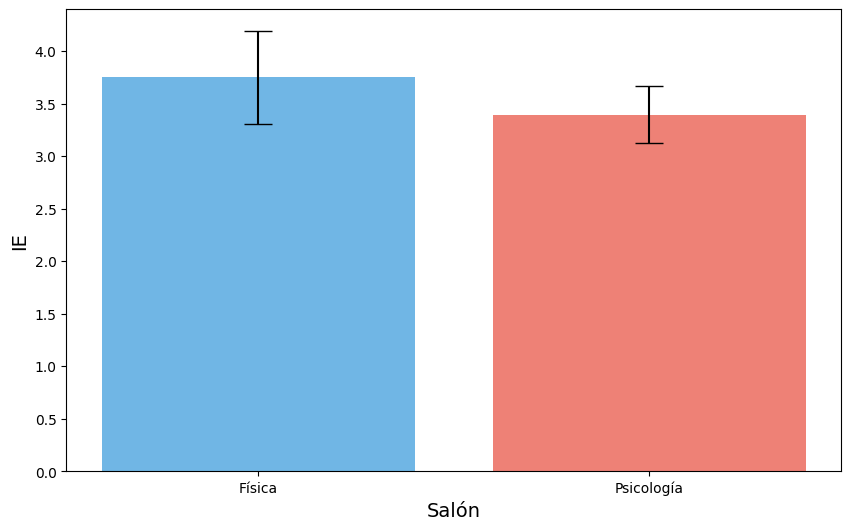

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular las medias y desviaciones estándar de cada grupo
group_means = df.groupby("carrera")["auto"].mean()
group_std = df.groupby("carrera")["auto"].std()

# Crear la figura y el axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define colores
colors = ["#3498db", "#e74c3c"]

# Generar las barras
bars = ax.bar(
    group_means.index, group_means, yerr=group_std, capsize=10, color=colors, alpha=0.7
)

# Añade el título y las etquetas
ax.set_ylabel("IE", fontsize=14)
ax.set_xlabel("Salón", fontsize=14)

plt.show()

También podemos utilizarlo para crear dos gráficos en una misma imagen. En este caso haremos el gráfico de dispersión de Empatía e Inteligencia emocional.

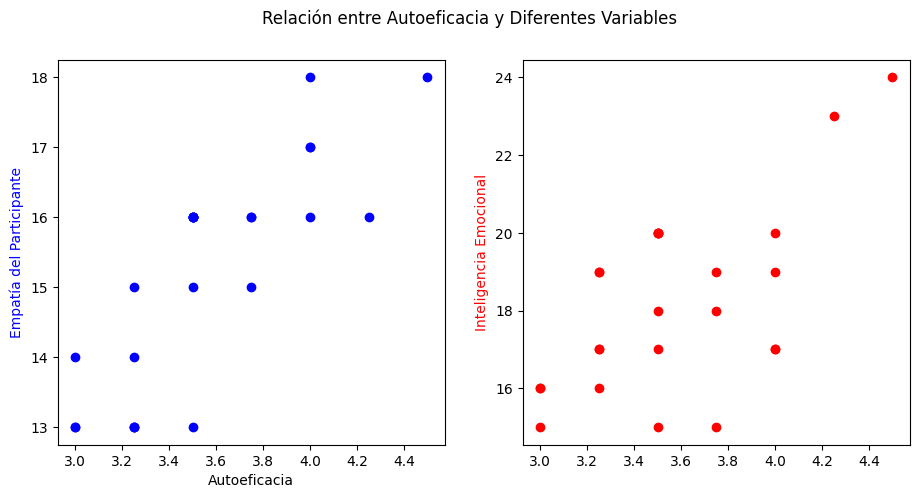

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
ax1.scatter(x="auto", y="em", color="blue", data=df)
ax1.set_xlabel("Autoeficacia")
ax1.set_ylabel("Empatía del Participante", color="blue")

ax2.scatter(x="auto", y="ie", color="red", data=df)
ax2.set_ylabel("Inteligencia Emocional", color="red")
plt.suptitle("Relación entre Autoeficacia y Diferentes Variables")  # Centrar el título
plt.show()

Si queremos explorar más nuestros datos, incluso podemos juntar los dos gráficos al crear dos ejes Y en uno solo... ¡Incluso sin normalizar puntajes!

En este caso, este gráfico no sería concluyente de nada, ya que sin la normalización de puntajes no nos estamos dando una idea completamente exacta de la dispersión, pero sí quizá de la tendencia.

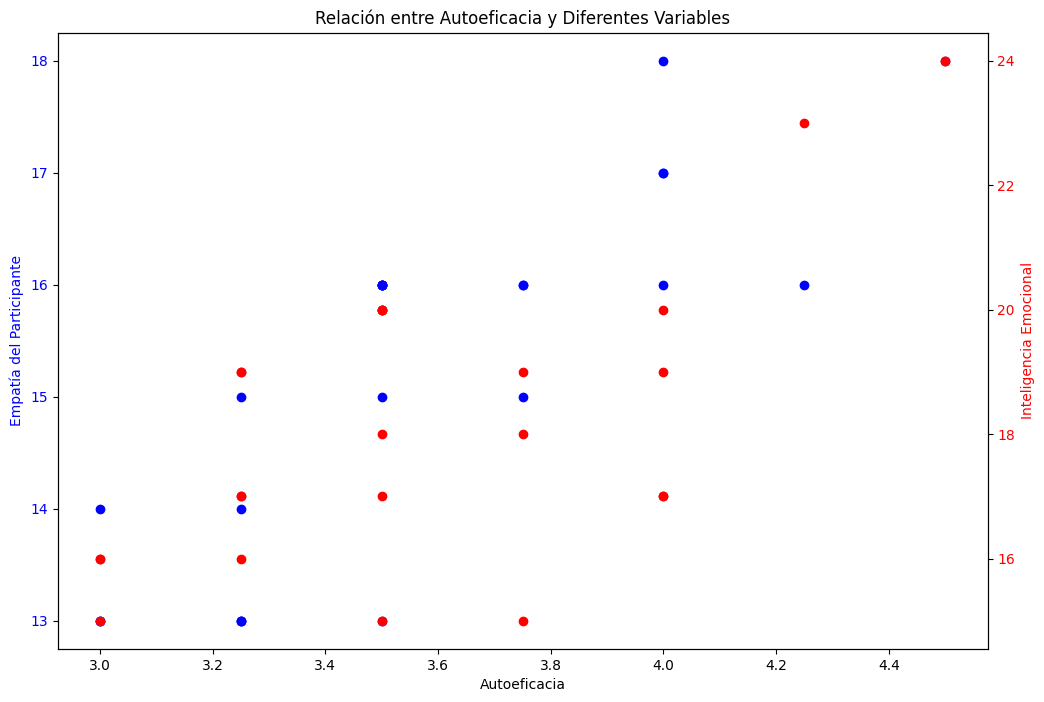

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.scatter(x="auto", y="em", color="blue", data=df)
ax1.set_xlabel("Autoeficacia")
ax1.set_ylabel("Empatía del Participante", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.scatter(x="auto", y="ie", color="red", data=df)
ax2.set_ylabel("Inteligencia Emocional", color="red")
ax2.tick_params(axis="y", labelcolor="red")
plt.title("Relación entre Autoeficacia y Diferentes Variables")

plt.show()

Y finalmente también podemos realizar customizaciones como agregarle una imagen de fondo o distintos estilos. En este caso, utilizaremos fondos de libre uso para la demostración, obteniéndolos con el comando `!wget`

In [ ]:
!wget -O background.jpg https://cdn.pixabay.com/photo/2023/08/15/05/13/ai-generated-8191260_1280.jpg

--2024-09-11 05:38:59--  https://cdn.pixabay.com/photo/2023/08/15/05/13/ai-generated-8191260_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.40.96, 172.64.147.160, 2606:4700:4400::ac40:93a0, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.40.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 360633 (352K) [image/jpeg]
Saving to: ‘background.jpg’

background.jpg      100%[===================>] 352.18K  --.-KB/s    in 0.05s   

2024-09-11 05:38:59 (7.10 MB/s) - ‘background.jpg’ saved [360633/360633]



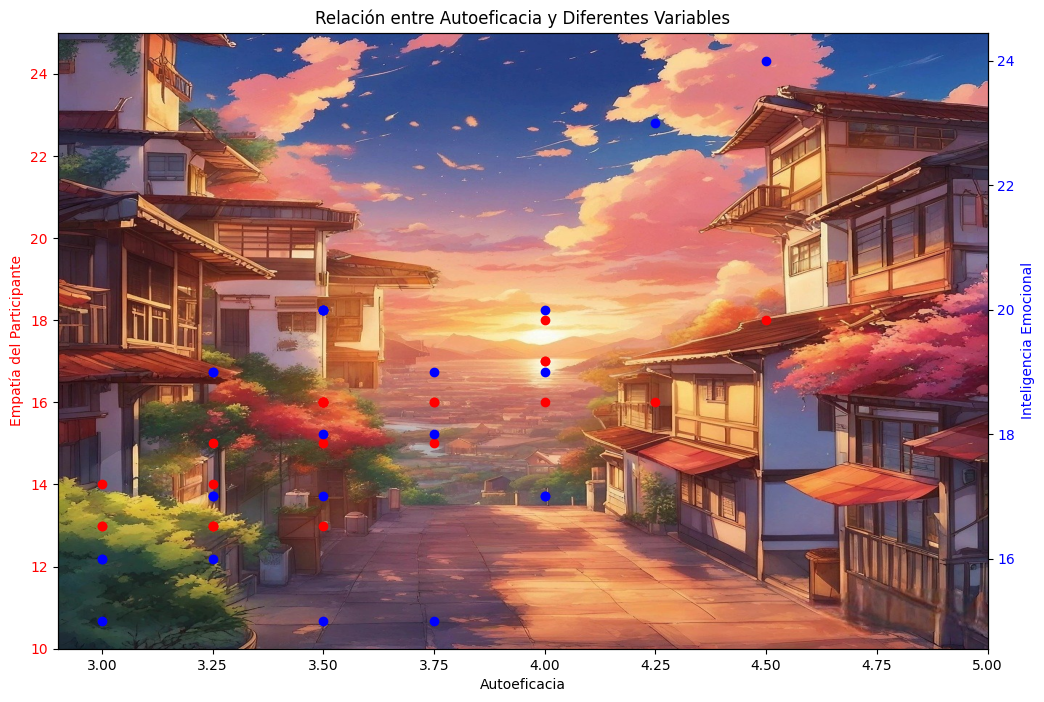

In [ ]:
# Primero hay que importar el módulo de matplotlib para que lea imágenes.
import matplotlib.image as mpimg

img = mpimg.imread("background.jpg")

# Luego podemos continuar con la lógica de la figura.
fig, ax1 = plt.subplots(figsize=(12, 8))


ax1.scatter(x="auto", y="em", color="red", data=df)
ax1.set_xlabel("Autoeficacia")
ax1.set_ylabel("Empatía del Participante", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax1.imshow(
    img, aspect="auto", extent=[2.9, 5, 10, 25]
)  # extent = [xmin, xmax, ymin, ymax]

ax2 = ax1.twinx()
ax2.scatter(x="auto", y="ie", color="blue", data=df)
ax2.set_ylabel("Inteligencia Emocional", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")
plt.title("Relación entre Autoeficacia y Diferentes Variables")

plt.show()

Enlaces con los que pueden experimentar:

`https://cdn.pixabay.com/photo/2023/08/15/05/13/ai-generated-8191260_1280.jpg`

`https://cdn.pixabay.com/photo/2024/08/14/22/51/ai-generated-8969819_1280.jpg`

`https://cdn.pixabay.com/photo/2023/12/11/20/07/ai-generated-8444361_1280.png`

**Tutorial Elaborado por:**

> Daniel Falcón Quintana.

> Miguel Dávila Palomino.

> Marcelo García Polo.